# Задание 1. Исследование набора данных

## Датасет

Этот набор данных содержит почасовое количество арендованных велосипедов в период с 2011 по 2012 год в системе Capital bikeshare с соответствующей информацией о погоде и сезонах.

Источник данных - [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset).

Используются реальные данные.

### Атрибуты

| Атрибут    | Тип                   | Характеристика                                                                                                                | Возможные значения                                                                                                                                                                                                                                                                                                                                            |      
|------------|-----------------------|-------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------| 
| instant    | числовой              | Индекс записи                                                                                                                 |                                                                                                                                                                                                                                                                                                                                                               |
| dteday     | строковый (дата)      | Дата                                                                                                                          |                                                                                                                                                                                                                                                                                                                                                               |
| season     | численный (категории) | Время года                                                                                                                    | 1 - зима, 2 - весна, 3 - лето, 4 - осень                                                                                                                                                                                                                                                                                                                      | 
| yr         | численный             | Год                                                                                                                           | 0 - 2011, 1 - 2012                                                                                                                                                                                                                                                                                                                                            |
| mnth       | численный             | Месяц                                                                                                                         | 1-12                                                                                                                                                                                                                                                                                                                                                          |
| hr         | численный             | Час                                                                                                                           | 0-23                                                                                                                                                                                                                                                                                                                                                          |
| holiday    | численный (булевый)   | Выходной                                                                                                                      | 1 - выходной, 0 - нет                                                                                                                                                                                                                                                                                                                                         |
| weekday    | численный             | День недели                                                                                                                   | 1-7                                                                                                                                                                                                                                                                                                                                                           |
| workingday | численный (булевый)   | Рабочий день                                                                                                                  | 1 - рабочий день, 0 - выходной или праздник                                                                                                                                                                                                                                                                                                                   |
| weathersit | численный (категории) | Погода                                                                                                                        | 1 - Ясно, малооблачно, Переменная облачность, Переменная облачность без осадков, <br/>2 - Туман + Облачно, Туман + Разорванные облака, Туман + Несколько облаков, Туман, <br/>3 - Небольшой снег, Небольшой дождь + Гроза + Рассеянные облака, Небольшой дождь + рассеянные облака, <br/>4 - Сильный дождь + Ледяные гранулы + Гроза + Туман, Снег + Туманная |
| temp       | численный             | Нормированная температура в Цельсиях. Значения посчитаны как (t-t_min) / (t_max-t_min), t_min = -8, t_max = +39               |                                                                                                                                                                                                                                                                                                                                                               |
| atemp      | численный             | Нормированная температура по ощущениям в Цельсиях. Значения посчитаны как (t-t_min) / (t_max-t_min), t_min = -16, t_max = +50 |                                                                                                                                                                                                                                                                                                                                                               |
| hum        | численный             | Нормированная влажность. Значения поделены на 100 (max)                                                                       |                                                                                                                                                                                                                                                                                                                                                               |
| windspeed  | численный             | Нормированная скорость ветра. Значения поделены на 67 (max)                                                                   |                                                                                                                                                                                                                                                                                                                                                               |
| casual     | численный             | Количество случайных пользователей                                                                                           |                                                                                                                                                                                                                                                                                                                                                               |
| registered | численный             | Количество зарегистрированных пользователей                                                                                   |                                                                                                                                                                                                                                                                                                                                                               |
| cnt        | численный             | Количество взятых напрокат велосипедов, включая случайных и зарегистрированных пользователей                                 |                                                                                                                                                                                                                                                                                                                                                               |


### Задача анализа

Хочется определить зависимость тех или иных атрибутов на количество пользователей, а так же научиться предсказывать количество пользователей в зависимости от данных условий.

## Преобразование датасета

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/hour.csv")

Переименуем колонки в читаемый формат

In [3]:
df = df.rename(columns = {
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "cnt": "count"
});

Удалим столбец с индексом `instant`, поскольку Pandas осуществляет индексирование самостоятельно.

In [4]:
df.drop(["instant"], axis=1, inplace=True)

Удалим столбцы `year` и `date`, посколько нас не интересует год, а для анализа даты достаточно других данных - месяца, дня недели, выходного.

In [5]:
df.drop(["year", "date"], axis=1, inplace=True)

После всех преобразований получаем таблицу вида

In [6]:
df.head()

,season,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Анализ датасета

Для каждого атрибута численного и булевого типа определим:
1. Среднее значение
2. СКО


In [7]:
pd.DataFrame({
    "mean": df.mean(),
    "std": df.std()
})

,mean,std
season,2.501640,1.106918
month,6.537775,3.438776
hour,11.546752,6.914405
holiday,0.028770,0.167165
weekday,3.003683,2.005771
workingday,0.682721,0.465431
weathersit,1.425283,0.639357
temp,0.496987,0.192556
atemp,0.475775,0.171850
hum,0.627229,0.192930


Построим гистограмму распределения значений

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

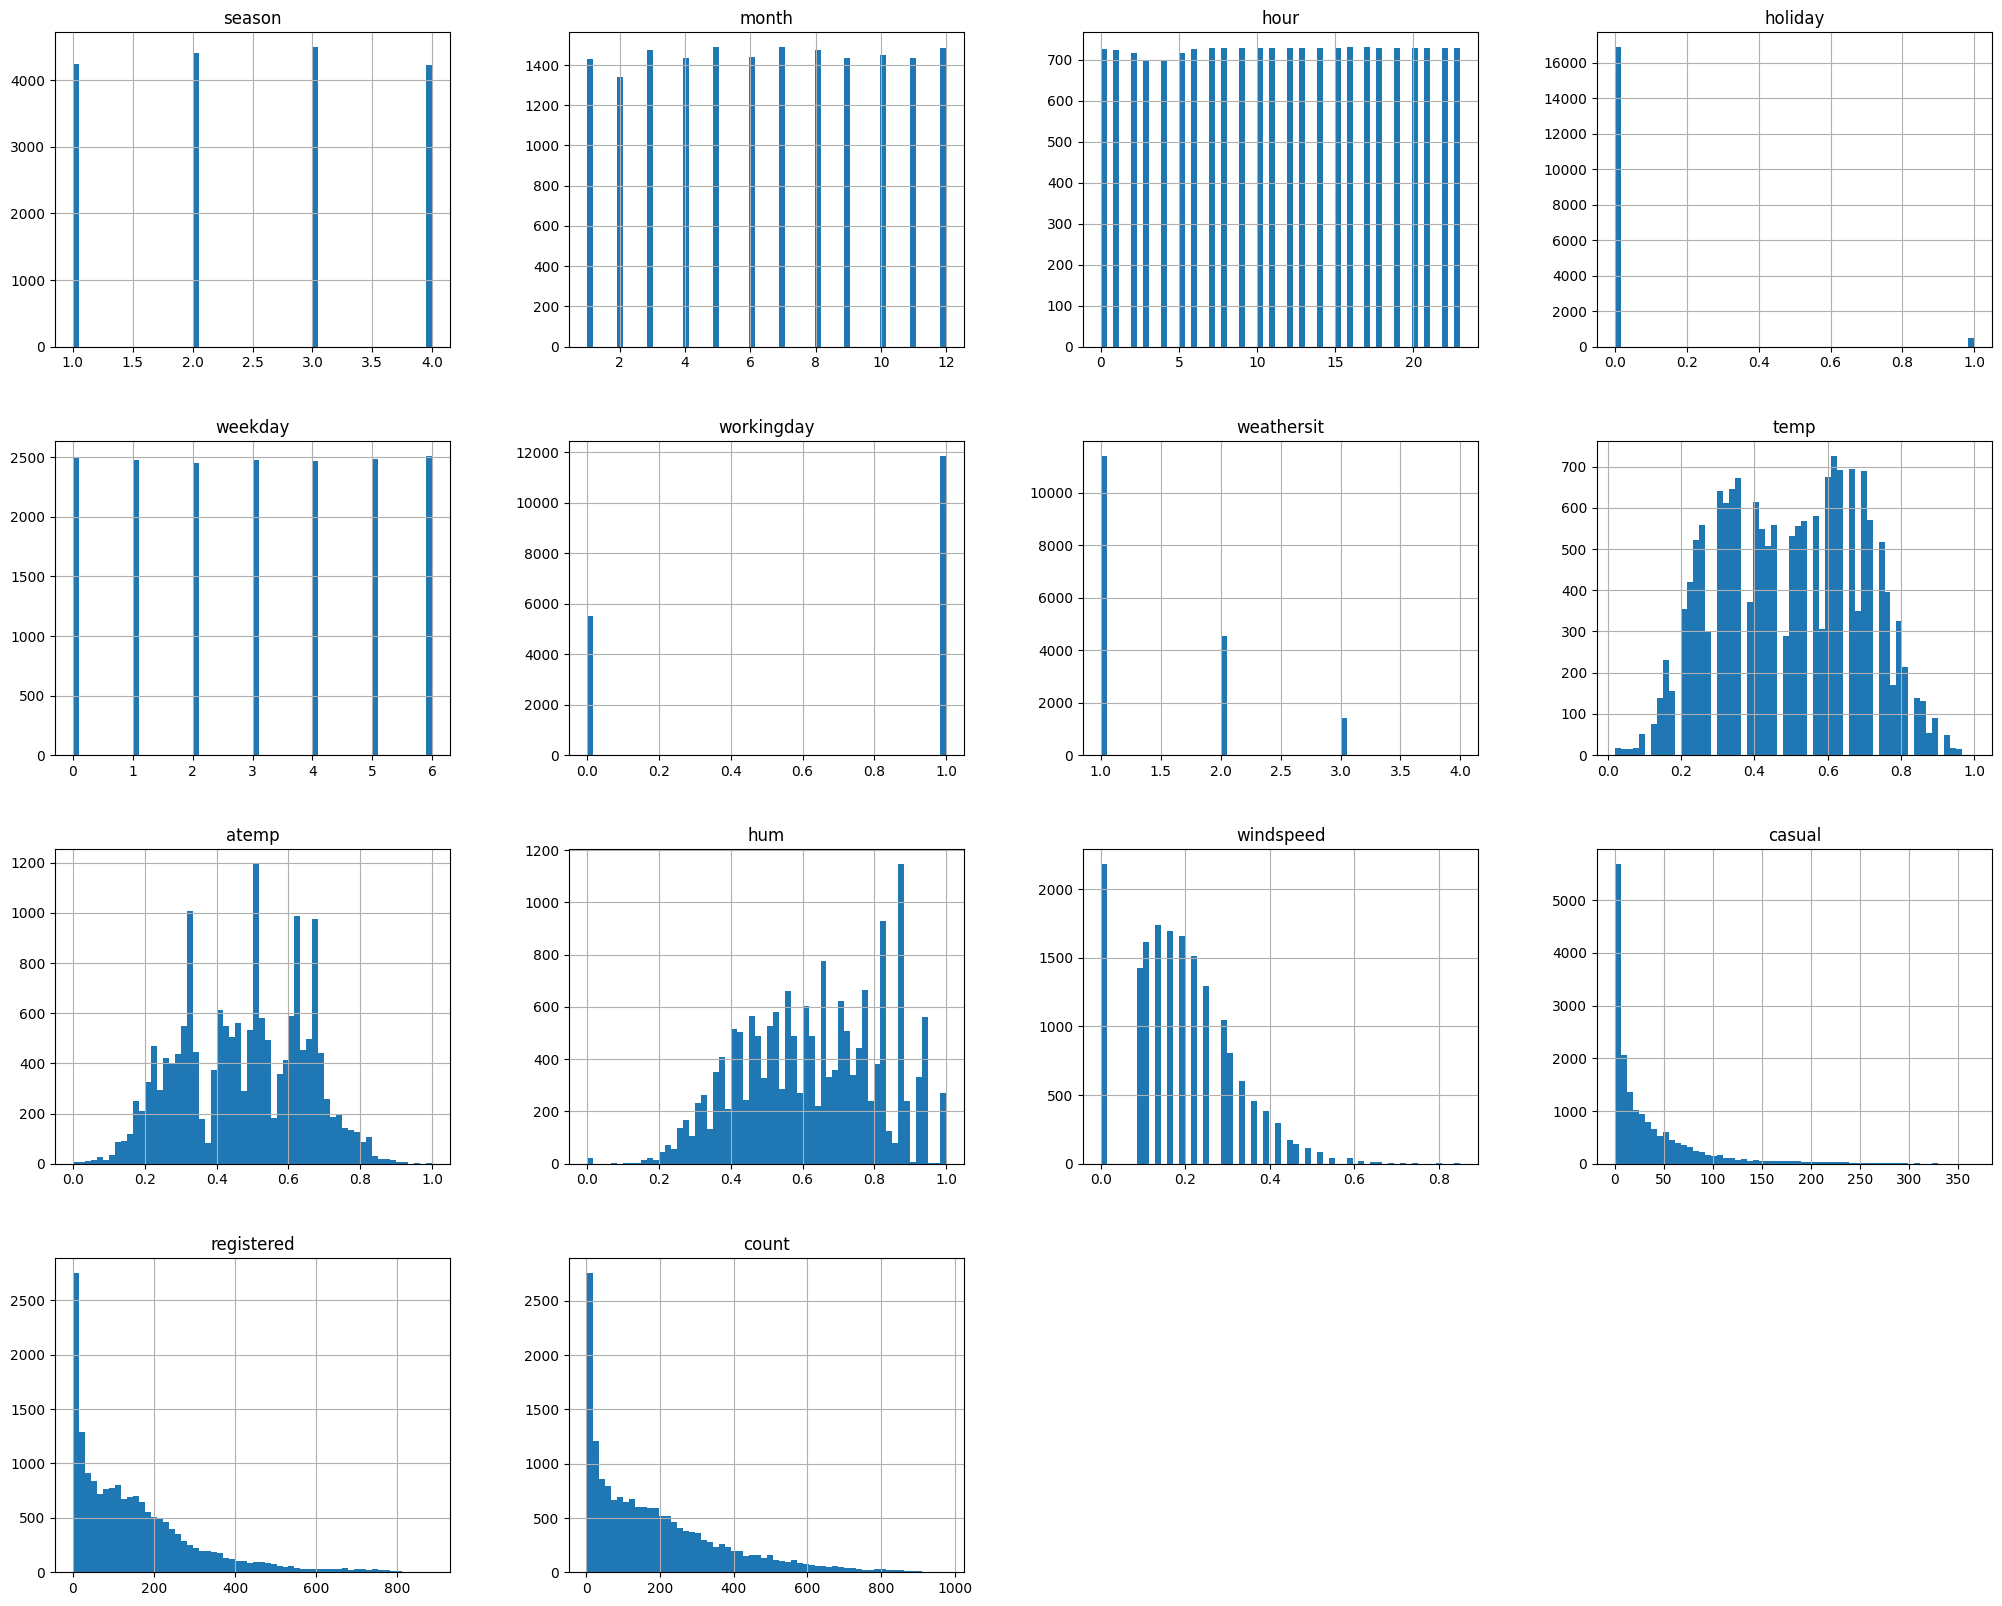

In [10]:
df.hist(bins=60, figsize=(25, 20));

Определим наличие выбросов с помощью метода межквартильного диапазона (IQR).

Будем считать наблюдение выбросом, если его значение в 1,5 раза больше (меньше) IQR.

In [12]:
threshold = 1.5
outliers = {}

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers[column] = df[(df[column] < Q1 - threshold * IQR) | (df[column] > Q3 + threshold * IQR)].size

In [13]:
pd.DataFrame({
    "outliers": outliers
})

,outliers
atemp,0
casual,16688
count,7070
holiday,7000
hour,0
hum,308
month,0
registered,9520
season,0
temp,0


Определим, содержит ли датасет пропущенные значения. Для этого вычислим строки, содержащие хотя бы 1 пропущенное значение (`None`, `numpy.NaN`)

In [14]:
(df.isna().sum(axis = 1) > 0).sum()

0

Датасет не содержит выбросов, о чем так же сказано в его описании.

> **Has Missing Values?**
> 
> No


### Корреляция между параметрами

In [17]:
correlation = df.corr()
correlation.style.background_gradient(cmap = 'coolwarm')

,season,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
season,1.000000,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
month,0.830386,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hour,-0.006117,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.150625,0.164411,-0.276498,-0.010588,-0.037158,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911


*Положительная корреляция* - когда одна переменная увеличивается, другая также увеличивается, а *отрицательная корреляция* - когда одна переменная увеличивается, другая уменьшается.

Все коэффициенты корреляции по диагонали таблицы равны 1, потому что каждая переменная коррелирует сама с собой.

Все остальные коэффициенты корреляции указывают на корреляцию между различными попарными комбинациями переменных. 

Чем дальше коэффициент корреляции от нуля, тем сильнее связь между двумя переменными. 


Сгруппируем комбинации по абсолютному значению корреляции

In [23]:
from itertools import combinations
from math import ceil

In [24]:
correlations = {}

for pair in combinations(df.columns, 2):
    left, top = pair
    value = correlation[left][top]
    key = ceil(abs(value) * 10) / 10
    result = (left, top, round(value, 2))
    
    if key not in correlations:
        correlations[key] = [result]
    else:
        correlations[key].append(result)

correlations = dict(sorted(correlations.items(), reverse=True))

Будем считать, что атрибуты с абсолютным значением корреляции < 0.1 не имеют корреляции

In [25]:
print(0.1)
for item in correlations[0.1]:
    print(item)

0.1
('season', 'hour', -0.01)
('season', 'holiday', -0.01)
('season', 'weekday', -0.0)
('season', 'workingday', 0.01)
('season', 'weathersit', -0.01)
('month', 'hour', -0.01)
('month', 'holiday', 0.02)
('month', 'weekday', 0.01)
('month', 'workingday', -0.0)
('month', 'weathersit', 0.01)
('month', 'casual', 0.07)
('hour', 'holiday', 0.0)
('hour', 'weekday', -0.0)
('hour', 'workingday', 0.0)
('hour', 'weathersit', -0.02)
('holiday', 'weathersit', -0.02)
('holiday', 'temp', -0.03)
('holiday', 'atemp', -0.03)
('holiday', 'hum', -0.01)
('holiday', 'windspeed', 0.0)
('holiday', 'casual', 0.03)
('holiday', 'registered', -0.05)
('holiday', 'count', -0.03)
('weekday', 'workingday', 0.04)
('weekday', 'weathersit', 0.0)
('weekday', 'temp', -0.0)
('weekday', 'atemp', -0.01)
('weekday', 'hum', -0.04)
('weekday', 'windspeed', 0.01)
('weekday', 'casual', 0.03)
('weekday', 'registered', 0.02)
('weekday', 'count', 0.03)
('workingday', 'weathersit', 0.04)
('workingday', 'temp', 0.06)
('workingday', 'at

Будем считать, что атрибуты с абсолютным значением корреляции >= 0.5 имеют высокую корреляцию

In [26]:
items = filter(lambda item: item[0] >= 0.5, correlations.items())

for key, value in sorted(items, reverse=True):
    print(key)
    for item in value:
        print(item)
    print()

1.0
('temp', 'atemp', 0.99)
('registered', 'count', 0.97)

0.9
('season', 'month', 0.83)

0.7
('casual', 'count', 0.69)

0.6
('casual', 'registered', 0.51)

0.5
('weathersit', 'hum', 0.42)
('temp', 'casual', 0.46)
('temp', 'count', 0.4)
('atemp', 'casual', 0.45)
('atemp', 'count', 0.4)



Видим, что высококоррелированы между собой атрибуты:

- температура и температура по ощущениям
- количество поездок зарегистриванных пользователей и общее количество поездок
- время года и месяца
- количество поездок случайных пользователей и общее количество поездок
- количество поездок случайных и зарегистрированных пользователей
- тип погоды и влажность
- температура и количество поездок случайных пользователей
- температура и общее количество поездок
- температура по ощущениям и количество поездок случайных пользователей
- температура по ощущениям и общее количество поездок

Из логически значимых корреляций:

- температура и температура по ощущениям
- температура и количество поездок случайных пользователей
- температура и общее количество поездок
- температура по ощущениям и количество поездок случайных пользователей
- температура по ощущениям и общее количество поездок

Построим матрицу графиков рассеивания для этих 5 наблюдений. Для этого выделим подмножество из DataFrame `correlation`

In [57]:
selection = df[['temp', 'atemp', 'count', 'casual', 'registered']]
selection.head()

,temp,atemp,count,casual,registered
0,0.24,0.2879,16,3,13
1,0.22,0.2727,40,8,32
2,0.22,0.2727,32,5,27
3,0.24,0.2879,13,3,10
4,0.24,0.2879,1,0,1


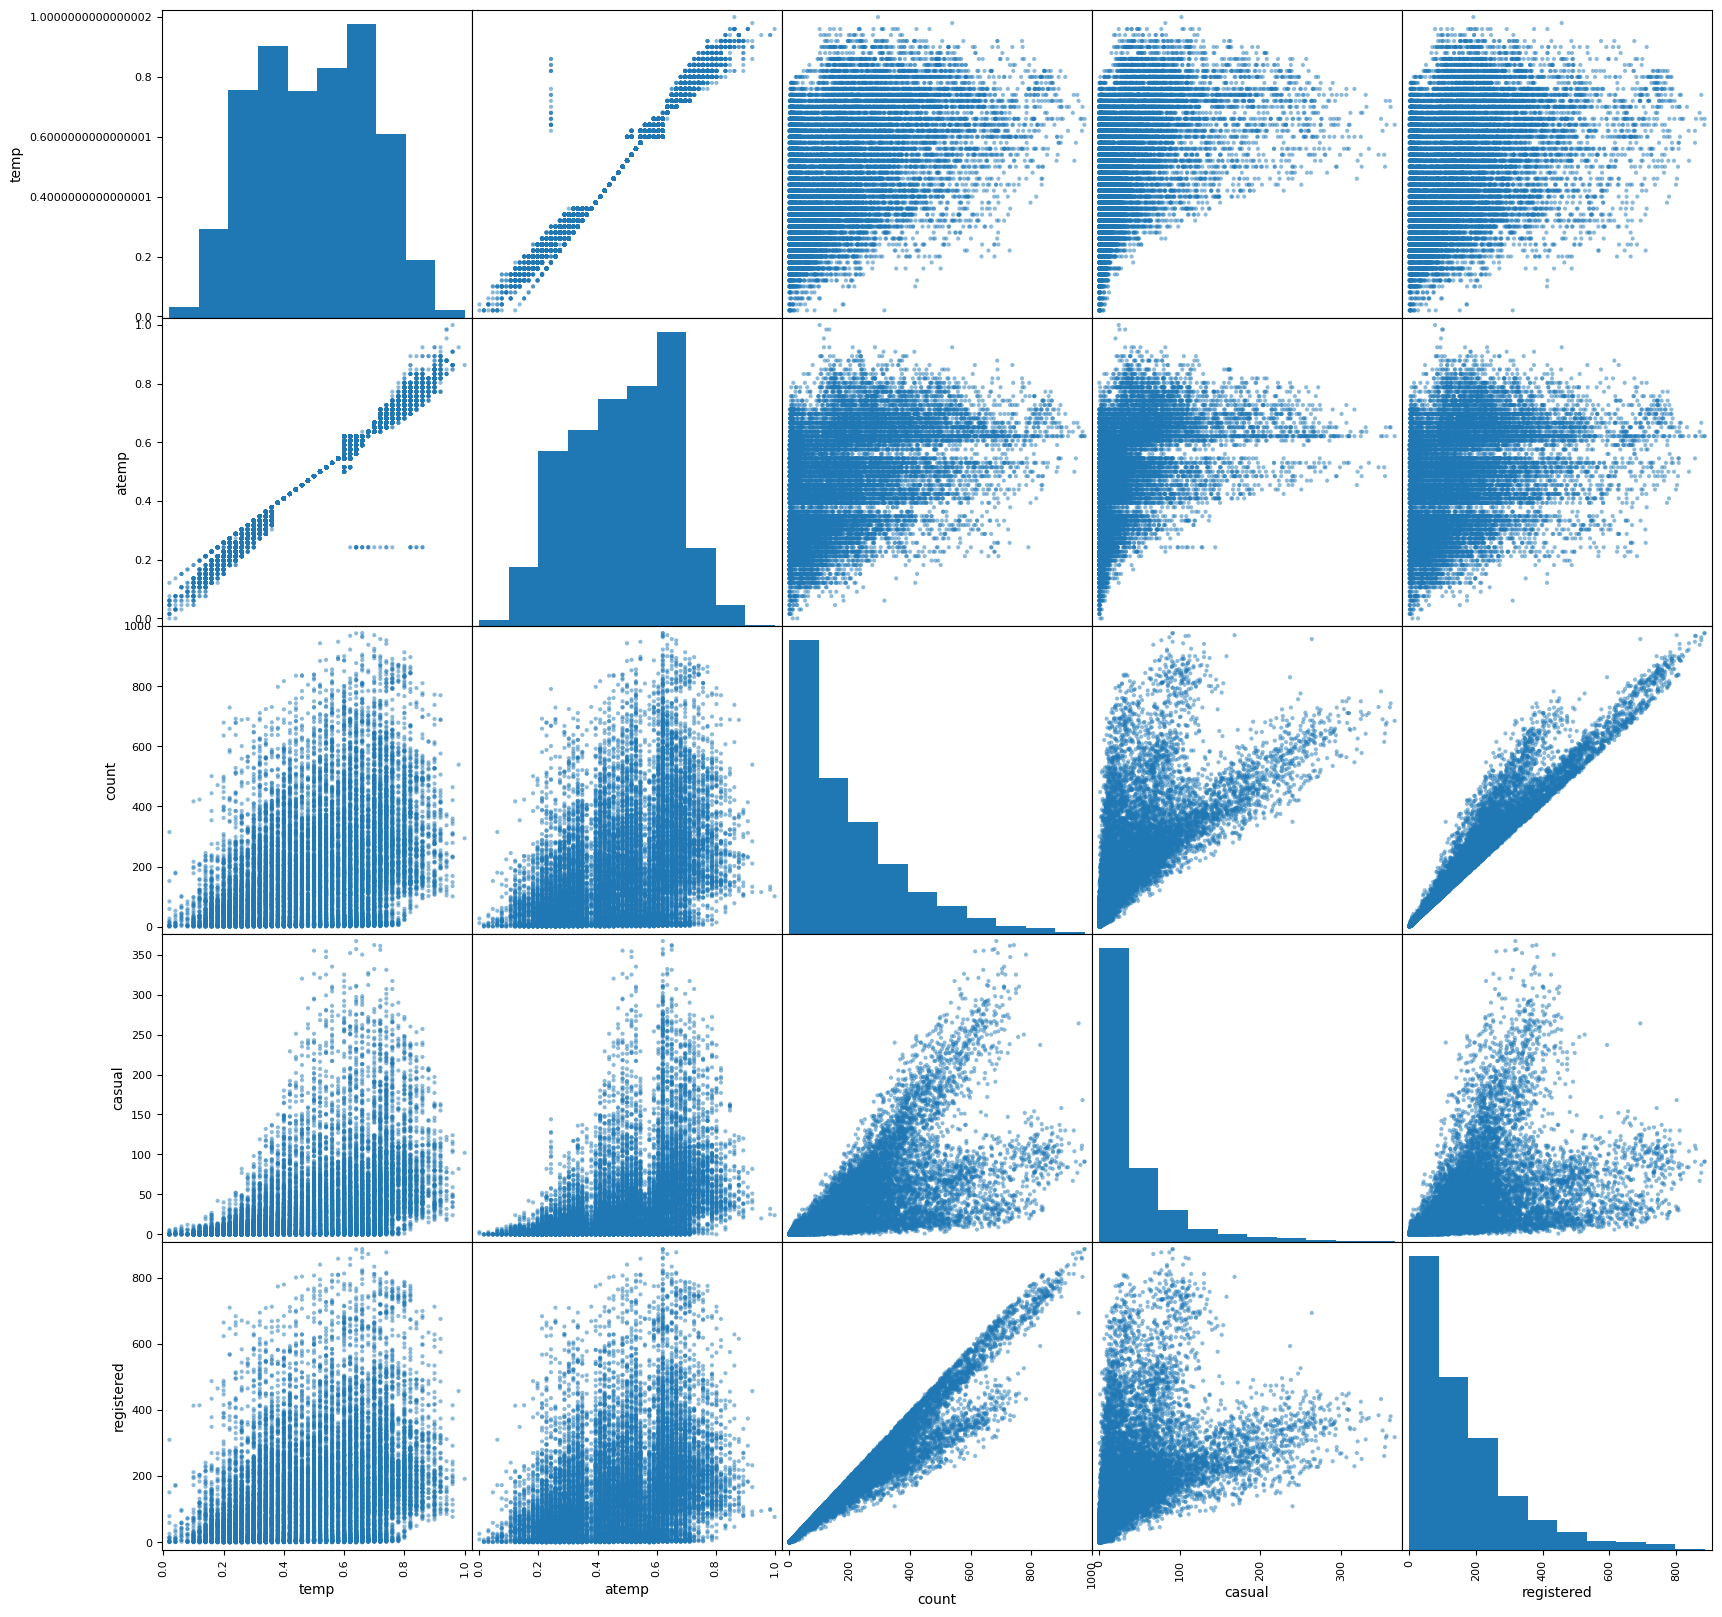

In [60]:
pd.plotting.scatter_matrix(selection, figsize=(20, 20));

Интерпретируем графики.

Наблюдаем сильную корреляцию между температурой и температурой по ощущениям. Также на графике есть серия точек, которые визуально нарушают взаимосвязь величин.

Наблюдаем положительную корреляцию для:
- температуры и количество поездок случайных пользователей
- температуры и общего количества поездок
- температуры по ощущениям и количества поездок случайных пользователей
- температуры по ощущениям и общего количества поездок

Построим график рассеивания для влажности и скорости ветра

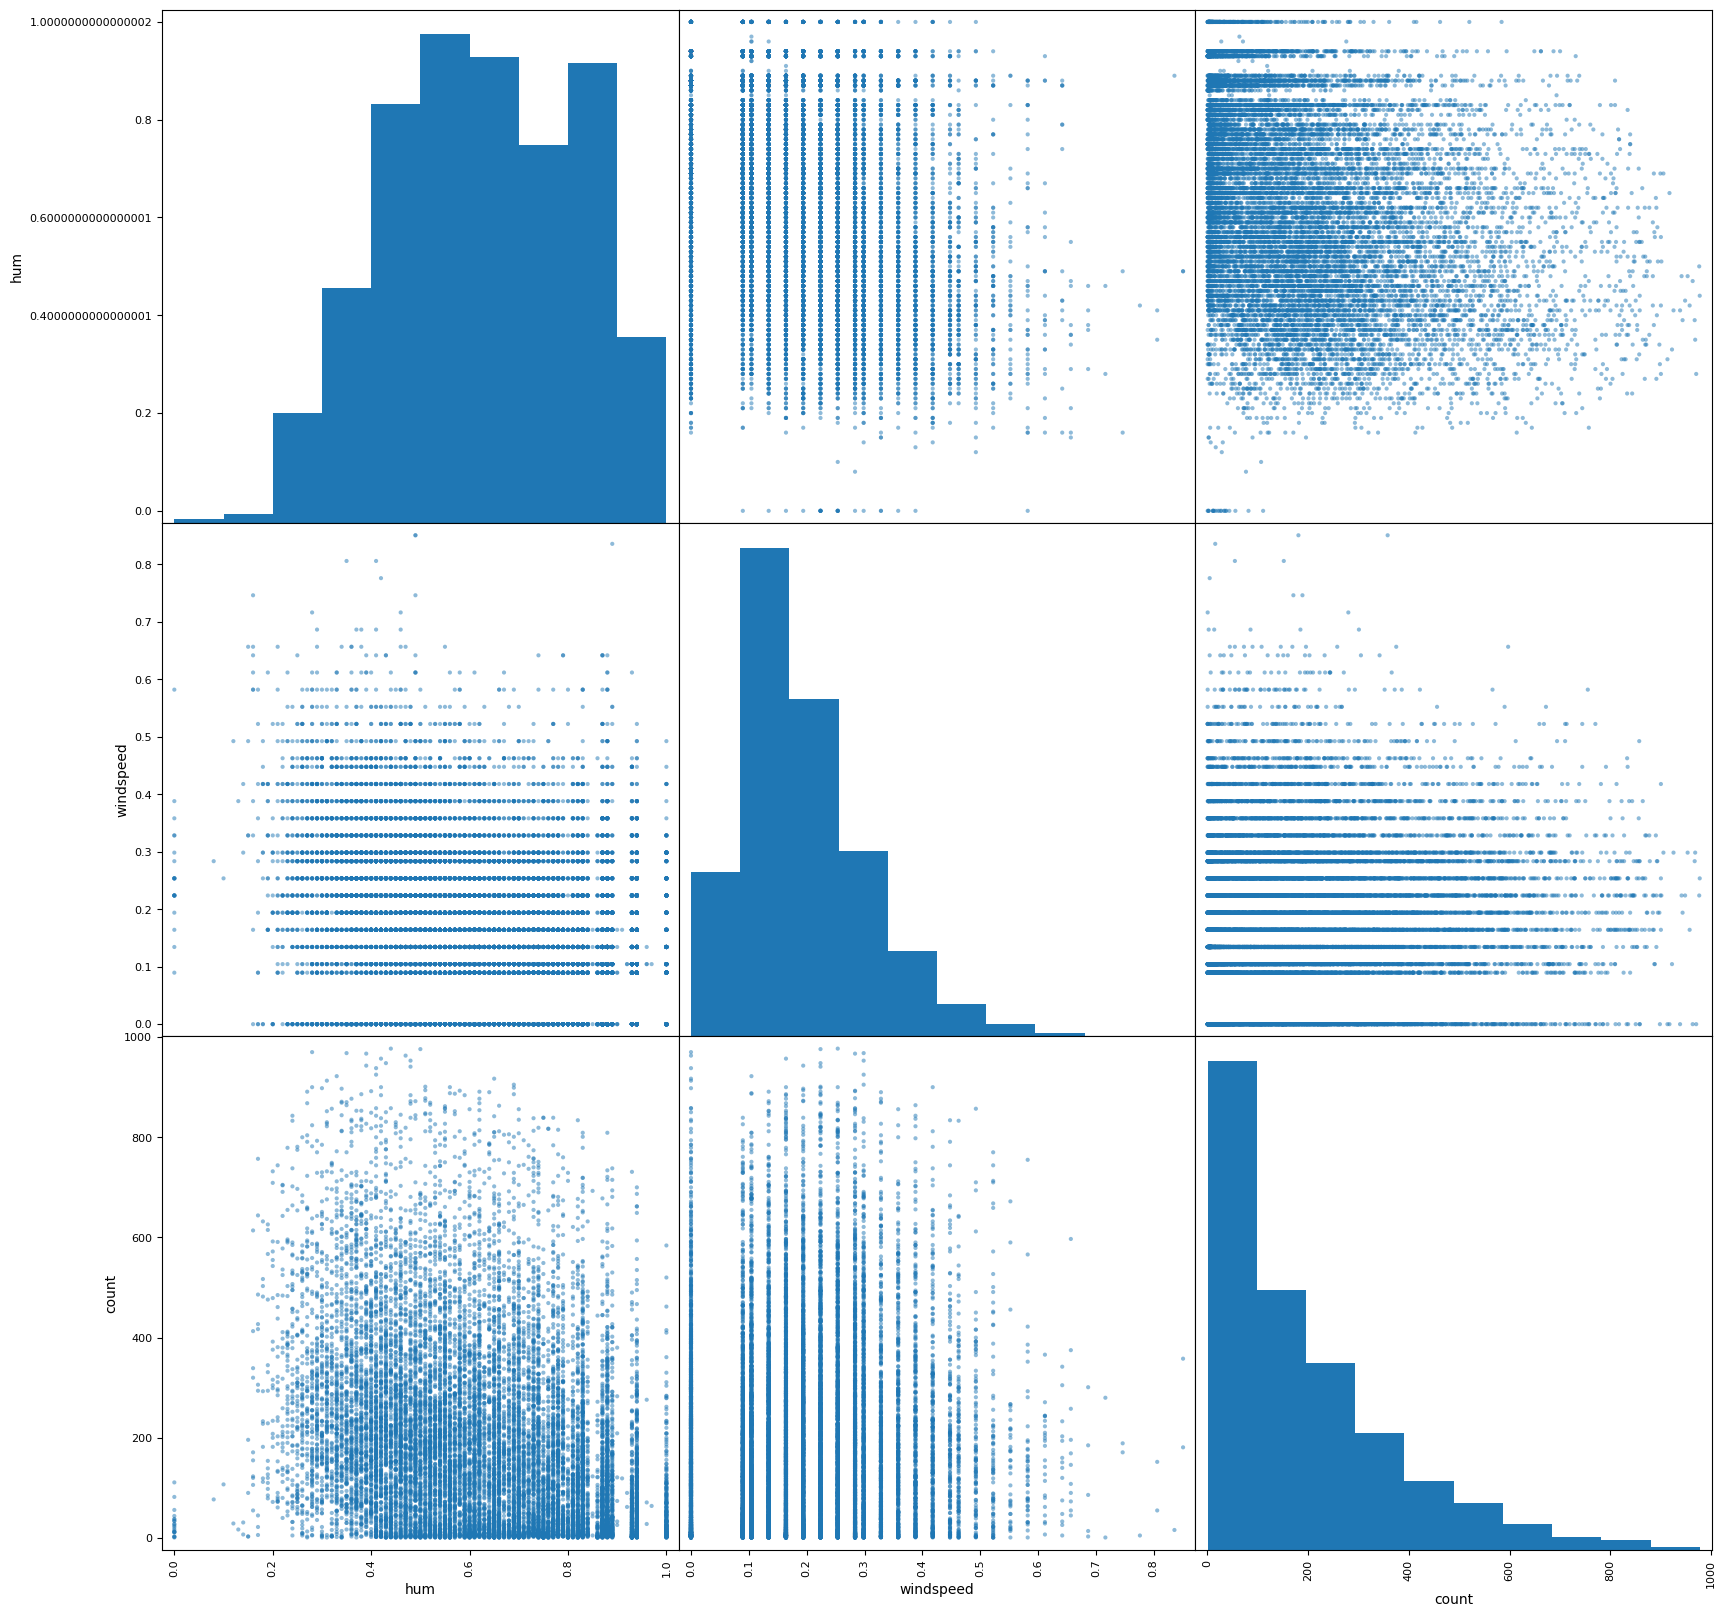

In [64]:
pd.plotting.scatter_matrix(df[["hum", "windspeed", "count"]], figsize=(20, 20));

Наблюдаем отрицательную корреляцию скорости ветра и количества поездок, а также для влажности и количества поездок.

Построим график рассеивания для времени суток (часа) и общего количества поездок.

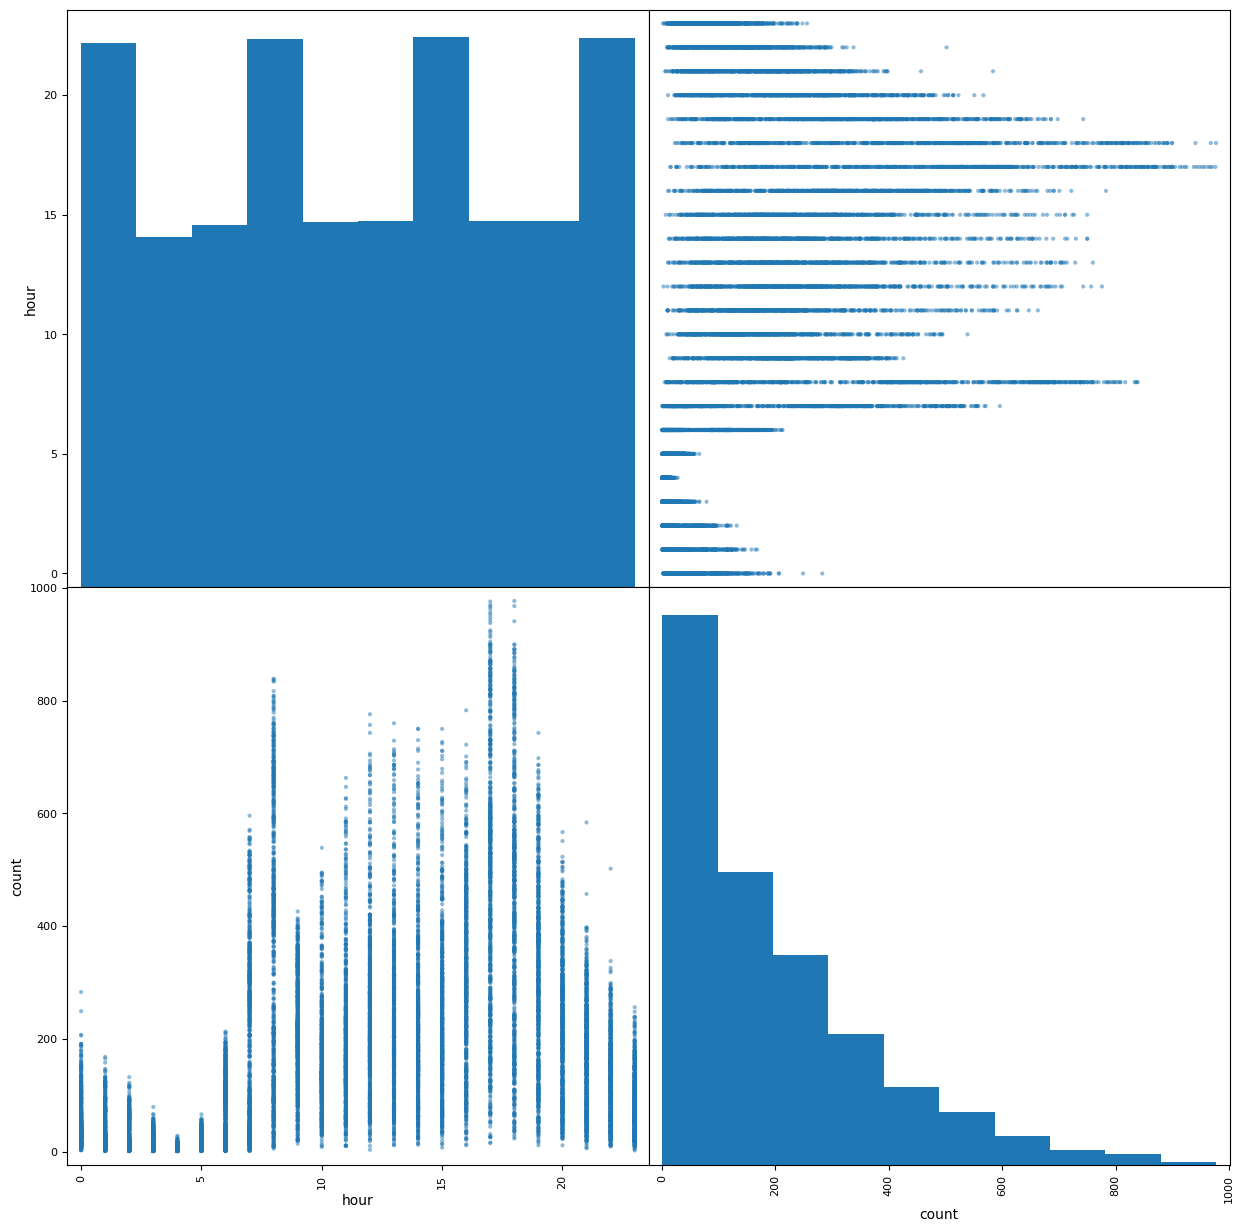

In [68]:
pd.plotting.scatter_matrix(df[["hour", "count"]], figsize=(15, 15));

Наблюдаем самые популярные у пользователей часы аренды.
